In [1]:
import pandas as pd
import numpy as np 
import os

In [2]:
os.chdir(r'C:\Users\ASUS\Desktop\DataSet\NYC-Taxi-Fares-Prediction-master')

In [3]:
# Read data 
df=pd.read_csv('taxifare.csv')

In [4]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [5]:
df.shape

(120000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 7.3+ MB


In [7]:
#### Feature Engineering with respect to Datetime

In [8]:
import datetime

In [9]:
pd.to_datetime(df['pickup_datetime'])

0        2010-04-19 08:17:56+00:00
1        2010-04-17 15:43:53+00:00
2        2010-04-17 11:23:26+00:00
3        2010-04-11 21:25:03+00:00
4        2010-04-17 02:19:01+00:00
                    ...           
119995   2010-04-18 14:33:03+00:00
119996   2010-04-23 10:27:48+00:00
119997   2010-04-18 18:50:40+00:00
119998   2010-04-13 08:14:44+00:00
119999   2010-04-17 16:00:14+00:00
Name: pickup_datetime, Length: 120000, dtype: datetime64[ns, UTC]

Python timedelta() function is present under datetime library which is generally used for calculating differences in dates and also can be used for date manipulations in Python. 
It is one of the easiest ways to perform date manipulations.

Indian Standard Time is 5 hours and 30 minutes ahead of Universal Time Coordinated.
 lets change time to IST. 

In [10]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])+datetime.timedelta(hours=6)# lets do for 6 hours 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 7.3 MB


In [12]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 14:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 21:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 17:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-12 03:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 08:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [13]:
df['Year']=df['pickup_datetime'].dt.year
df['Month']=df['pickup_datetime'].dt.month
df['Day']=df['pickup_datetime'].dt.day
df['Hours']=df['pickup_datetime'].dt.hour
df['Minutes']=df['pickup_datetime'].dt.minute

In [14]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes
0,2010-04-19 14:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,14,17
1,2010-04-17 21:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,21,43
2,2010-04-17 17:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,17,23
3,2010-04-12 03:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,12,3,25
4,2010-04-17 08:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,8,19


In [15]:
#further hours are distinguished as 0-for morning, 1-for night
df['mornight']=np.where(df['Hours']<12,0,1)

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight
0,2010-04-19 14:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,14,17,1
1,2010-04-17 21:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,21,43,1
2,2010-04-17 17:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,17,23,1
3,2010-04-12 03:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,12,3,25,0
4,2010-04-17 08:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,8,19,0


In [17]:
df.drop('pickup_datetime',axis=1,inplace=True)

In [18]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,14,17,1
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,21,43,1
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,17,23,1
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,12,3,25,0
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,8,19,0


In [19]:
df['fare_class'].unique()

array([0, 1], dtype=int64)

In [20]:
df['passenger_count'].unique()

array([1, 2, 5, 4, 3], dtype=int64)

In [21]:
### https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.haversine_distances.html#:~:text=The%20Haversine%20(or%20great%20circle,the%20data%20must%20be%202
from sklearn.metrics.pairwise import haversine_distances
from math import radians
newdelhi = [28.6139, 77.2090]#lat & long
bangalore = [12.9716, 77.5946]#lat & long

In [22]:
newdelhi_in_radians = [radians(_) for _ in newdelhi]
bangalore_in_radians = [radians(_) for _ in bangalore]

In [23]:
result = haversine_distances([newdelhi_in_radians, bangalore_in_radians])

In [24]:
result*6371000/1000  # multiply by Earth radius to get kilometers

array([[   0.       , 1739.8021019],
       [1739.8021019,    0.       ]])

In [25]:
np.radians(df['dropoff_latitude']-df["pickup_latitude"])

0         0.000248
1         0.000062
2         0.000264
3        -0.000144
4         0.000156
            ...   
119995   -0.000834
119996   -0.000564
119997   -0.000733
119998    0.000109
119999   -0.000155
Length: 120000, dtype: float64

#### Calculating The Haversine Distance
The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes. Important in navigation, it is a special case of a more general formula in spherical trigonometry, the law of haversines, that relates the sides and angles of spherical triangles.

In [26]:
###https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points


def haversine(df):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    lat1= np.radians(df["pickup_latitude"])
    lat2 = np.radians(df["dropoff_latitude"])
    #### Based on the formula  x1=drop_lat,x2=dropoff_long 
    dlat = np.radians(df['dropoff_latitude']-df["pickup_latitude"])
    dlong = np.radians(df["dropoff_longitude"]-df["pickup_longitude"])
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [27]:
df['Total distance']=haversine(df)

In [28]:
df.head()

,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2010,4,19,14,17,1,2.126312
1,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,2010,4,17,21,43,1,1.392307
2,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,2010,4,17,17,23,1,3.326763
3,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,2010,4,12,3,25,0,1.864129
4,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,2010,4,17,8,19,0,7.231321


In [29]:
df.drop(["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"],axis=1,inplace=True)

#### Regression Model

In [30]:
df.head()

,fare_amount,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,6.5,0,1,2010,4,19,14,17,1,2.126312
1,6.9,0,1,2010,4,17,21,43,1,1.392307
2,10.1,1,2,2010,4,17,17,23,1,3.326763
3,8.9,0,1,2010,4,12,3,25,0,1.864129
4,19.7,1,1,2010,4,17,8,19,0,7.231321


In [31]:
df.to_csv('final_data.csv',index=False)

In [32]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [33]:
X.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
0,0,1,2010,4,19,14,17,1,2.126312
1,0,1,2010,4,17,21,43,1,1.392307
2,1,2,2010,4,17,17,23,1,3.326763
3,0,1,2010,4,12,3,25,0,1.864129
4,1,1,2010,4,17,8,19,0,7.231321


In [34]:
y.head()

0     6.5
1     6.9
2    10.1
3     8.9
4    19.7
Name: fare_amount, dtype: float64

In [35]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

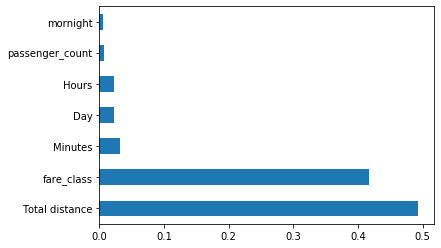

In [36]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [38]:
import xgboost

In [39]:
regressor=xgboost.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [40]:
y_pred=regressor.predict(X_test)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

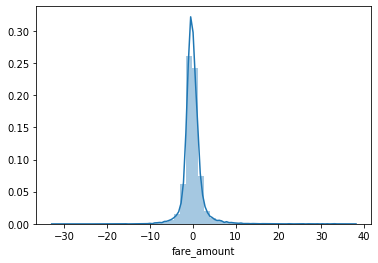

In [42]:
sns.distplot(y_test-y_pred)

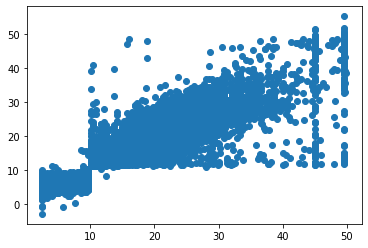

In [43]:
plt.scatter(y_test,y_pred)

In [44]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9398636269298908
MAE: 1.4076015088621114
MSE: 6.67342933431676
RMSE: 2.5832981504883943


#### HyperParameter Training

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [47]:
#Randomized Search CV

# Number of trees in Xgboost
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]

In [48]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [49]:

# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgboost.XGBRegressor()

In [50]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter =5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [51]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed: 20.7min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 20.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                              

In [52]:
xg_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1100,
 'min_child_weight': 6,
 'max_depth': 25,
 'learning_rate': '0.05'}

In [53]:
y_pred=xg_random.predict(X_test)

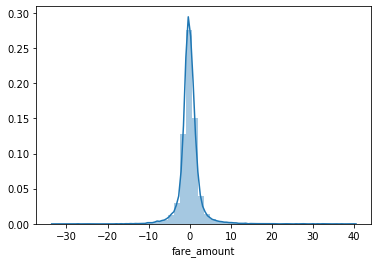

In [54]:
sns.distplot(y_test-y_pred)

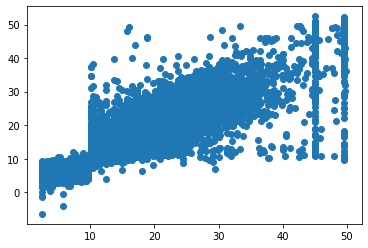

In [55]:
plt.scatter(y_test,y_pred)

In [56]:
from sklearn import metrics
print('R square:', np.sqrt(metrics.r2_score(y_test, y_pred)))
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R square: 0.9261619584736355
MAE: 1.584806668850912
MSE: 8.136049925569239
RMSE: 2.8523761893497217


#### Artificial Neural Network(Regression Problem)

In [57]:
X_train.head()

,fare_class,passenger_count,Year,Month,Day,Hours,Minutes,mornight,Total distance
40090,1,1,2010,4,13,2,17,0,3.181725
90425,0,2,2010,4,18,17,39,1,1.528133
63492,0,1,2010,4,12,4,53,0,4.020180
19581,1,1,2010,4,22,6,51,0,6.338458
39057,1,1,2010,4,15,2,46,0,6.823749


In [58]:
y_train.head()

40090    17.7
90425     4.9
63492     8.1
19581    17.7
39057    15.3
Name: fare_amount, dtype: float64

In [59]:
X_train.shape[1]

9

In [60]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout

In [61]:

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

# Fitting the ANN to the Training set
model_history=NN_model.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 20)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1280      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 166,145
Trainable params: 166,145
Non-tra

### Model Evaluation

In [62]:
prediction=NN_model.predict(X_test)

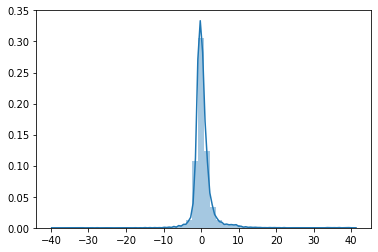

In [63]:
import seaborn as sns
sns.distplot(y_test.values.reshape(-1,1)-prediction)

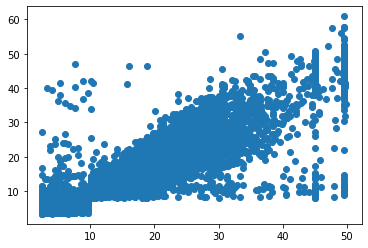

In [64]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)

In [65]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.4690517994573384
MSE: 8.638056397513742
RMSE: 2.9390570592477006


#### TPOTRegressor Automated Library

In [66]:
from tpot import TPOTRegressor

C:\Users\ASUS\anaconda03\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [67]:
regressor=TPOTRegressor()
regressor.fit(X_train,y_train)

TPOTRegressor(config_dict=None, crossover_rate=0.1, cv=5,
              disable_update_check=False, early_stop=None, generations=100,
              log_file=None, max_eval_time_mins=5, max_time_mins=None,
              memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
              periodic_checkpoint_folder=None, population_size=100,
              random_state=None, scoring=None, subsample=1.0, template=None,
              use_dask=False, verbosity=0, warm_start=False)

In [68]:
tpot = TPOTRegressor(generations=1, population_size=10, verbosity=2, random_state=42)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_taxiFaredocumentation_pipeline.py')


Generation 1 - Current best internal CV score: -6.6690938472816175

Best pipeline: ElasticNetCV(ExtraTreesRegressor(input_matrix, bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=16, n_estimators=100), l1_ratio=0.45, tol=0.001)
-6.546212823271019


In [69]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('final_data.csv', sep=',', dtype=np.float64)
features = tpot_data.drop('fare_amount', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['fare_amount'], random_state=42)


In [70]:
# Average CV score on the training set was: -6.6694533560074545
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=ExtraTreesRegressor(bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=10, min_samples_split=16, n_estimators=100)),
    ElasticNetCV(l1_ratio=0.45, tol=0.001)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [71]:
results


array([ 4.42025363,  7.19767828,  6.71159982, ...,  7.48672451,
       12.83794422,  7.10761679])

In [72]:
training_target

84145      9.7
60838     16.5
99429      4.9
26258     10.5
12165     15.7
          ... 
110268     8.9
119879     4.1
103694    14.1
860        6.1
15795      4.9
Name: fare_amount, Length: 90000, dtype: float64

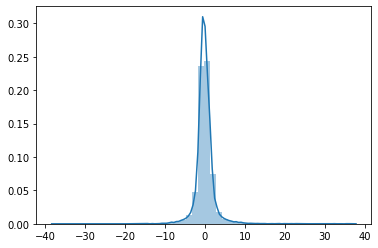

In [73]:
import seaborn as sns
sns.distplot(testing_target.values-results)

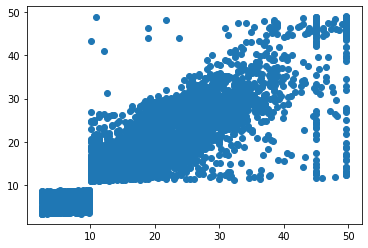

In [74]:
import matplotlib.pyplot as plt
plt.scatter(testing_target,results)

In [75]:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(testing_target, results))
print('MSE:', metrics.mean_squared_error(testing_target, results))
print('RMSE:', np.sqrt(metrics.mean_squared_error(testing_target, results)))

MAE: 1.4113103112597547
MSE: 6.329914885050569
RMSE: 2.5159322099473527


we got best score compare to xgboost